In [ ]:
import pandas as pd
from datetime import datetime
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creamos un DataFrame para leer los archivos

In [ ]:
empleado_df = pd.read_csv("/content/drive/MyDrive/PABLO/PY-PFINAL/empleados.csv")
proyecto_df = pd.read_csv("/content/drive/MyDrive/PABLO/PY-PFINAL/proyectos.csv")
empl_proy_df = pd.read_csv("/content/drive/MyDrive/PABLO/PY-PFINAL/empleado_proyecto.csv")

# **EMPLEADOS**

**Top 5 empleados que más años llevan en la compañía**

    TX_NOMBRE  AÑOS DE ALTA
30      Carla            27
0       Reina            24
101    Tonino            24
60    Antonio            23
71    Soledad            23


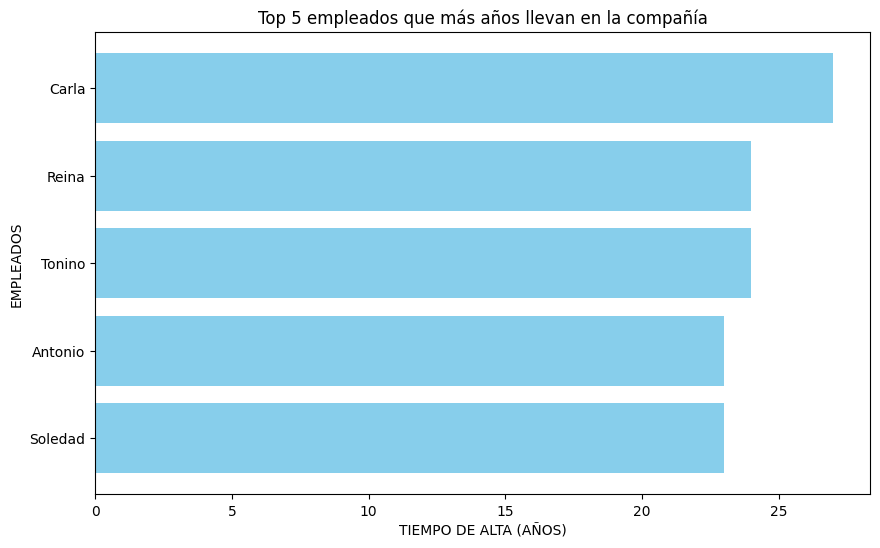

In [ ]:
# Conversión de datos de las columnas 'F_ALTA' y 'F_BAJA' a datatime
empleado_df['F_ALTA'] = pd.to_datetime(empleado_df['F_ALTA'])
empleado_df['F_BAJA'] = pd.to_datetime(empleado_df['F_BAJA'], errors='coerce')#Nat Not a Time(se cambian los null a este valor)

fecha_actual = datetime.now()

empleado_df['F_BAJA'] = empleado_df['F_BAJA'].fillna(fecha_actual)
empleado_df['AÑOS DE ALTA'] = empleado_df['F_BAJA'].dt.year - empleado_df['F_ALTA'].dt.year


# Mostrar el top 5 de empleados con el mayor tiempo de alta
top_5_empleados = empleado_df.nlargest(5, 'AÑOS DE ALTA')

print(top_5_empleados[['TX_NOMBRE', 'AÑOS DE ALTA']])

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.barh(top_5_empleados['TX_NOMBRE'], top_5_empleados['AÑOS DE ALTA'], color='skyblue')
plt.xlabel('TIEMPO DE ALTA (AÑOS)')
plt.ylabel('EMPLEADOS')
plt.title('Top 5 empleados que más años llevan en la compañía')
plt.gca().invert_yaxis()  # Invertir el eje y para que el empleado con mayor tiempo esté arriba
plt.show()


**Top 5 empleados más recientes**

    TX_NOMBRE            MÁS_RECIENTES
62       Tina 107 days 20:15:42.268317
4        Irma 418 days 20:15:42.268317
63    Augusto 472 days 20:15:42.268317
105    Susana 801 days 20:15:42.268317
36     Samuel 869 days 20:15:42.268317


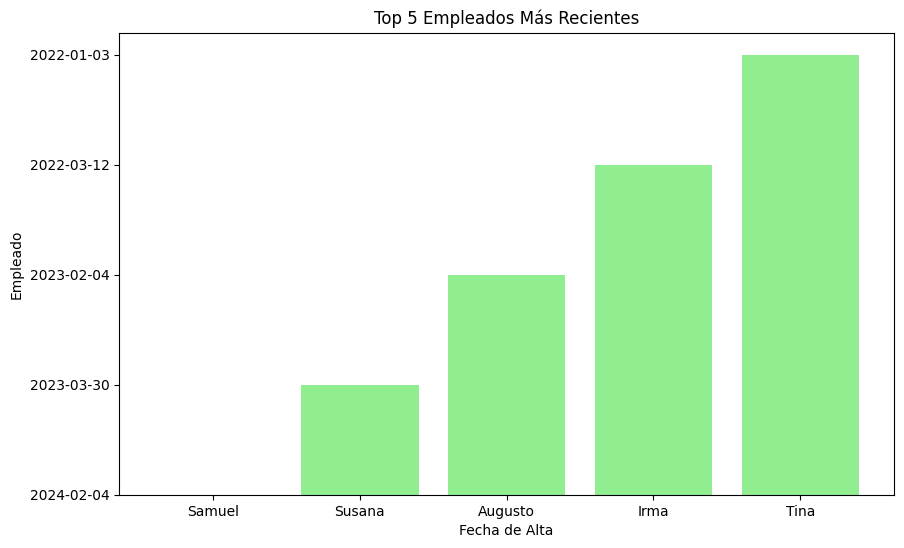

In [ ]:

# Sustituir valores nulos en 'F_BAJA' con la fecha actual
empleado_df['F_ACTUAL'] = datetime.now()
empleado_df['MÁS_RECIENTES'] = empleado_df['F_ACTUAL'] - empleado_df['F_ALTA']

# Seleccionar los 5 empleados más recientes
top_5_recientes = empleado_df.nsmallest(5, 'MÁS_RECIENTES')

print(top_5_recientes[['TX_NOMBRE', 'MÁS_RECIENTES']])

# Graficar los resultados
top_5_recientes_invertido = top_5_recientes.iloc[::-1]

plt.figure(figsize=(10, 6))
plt.bar(top_5_recientes_invertido['TX_NOMBRE'], top_5_recientes['F_ALTA'].dt.strftime('%Y-%m-%d'), color='lightgreen')
plt.xlabel('Fecha de Alta')
plt.ylabel('Empleado')
plt.title('Top 5 Empleados Más Recientes')
plt.gca()
plt.show()

**Distribución del número de años de los empleados en la empresa**

 Años  Empleados
    0          1
    1          3
    2          5
    3          2
    4          9
    5          9
    6         10
    7          7
    8          5
    9          6
   10          5
   11          7
   12          5
   13         11
   14          3
   15          4
   16          4
   18          3
   20          2
   21          1
   22          3
   23          2
   24          2
   27          1


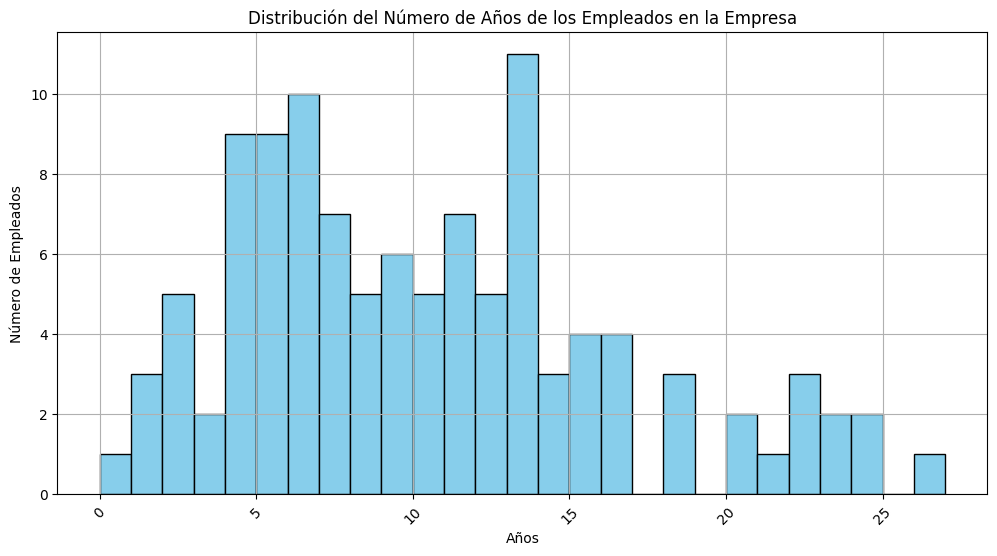

In [ ]:
anhos = pd.DataFrame({"Años": range(empleado_df['AÑOS DE ALTA'].min(), empleado_df['AÑOS DE ALTA'].max()+1)})

tablaAnhos = anhos.merge(empleado_df.groupby('AÑOS DE ALTA').size().reset_index(name="Empleados"), how="left",
                          left_on="Años", right_on='AÑOS DE ALTA')

tablaAnhos["Empleados"] = tablaAnhos["Empleados"].fillna(0).astype(int)


TablaAnhosSeleccionada = tablaAnhos[tablaAnhos["Empleados"] > 0]

print(TablaAnhosSeleccionada[["Años", "Empleados"]].to_string(index=False))

# Ajuste del Histograma: Ajustar el número de bins en el histograma para que
# represente mejor la distribución de los datos.
plt.figure(figsize=(12, 6))
plt.hist(empleado_df['AÑOS DE ALTA'], bins=range(empleado_df['AÑOS DE ALTA'].min(),
                                                 empleado_df['AÑOS DE ALTA'].max() + 1),
                                                 color='skyblue', edgecolor='black')
plt.xlabel('Años')
plt.ylabel('Número de Empleados')
plt.title('Distribución del Número de Años de los Empleados en la Empresa')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


**Evolución temporal de altas por años**

     Año  Altas
0   1992      1
1   1994      1
2   1997      1
3   1998      2
4   1999      4
5   2000      1
6   2001      3
7   2002      5
8   2003      2
9   2004      1
10  2006      2
11  2008      3
12  2009      4
13  2010      5
14  2011     17
15  2012      4
16  2013      7
17  2014      7
18  2015      7
19  2016      4
20  2017      6
21  2018      6
22  2019      6
23  2020      5
24  2021      1
25  2022      2
26  2023      2
27  2024      1


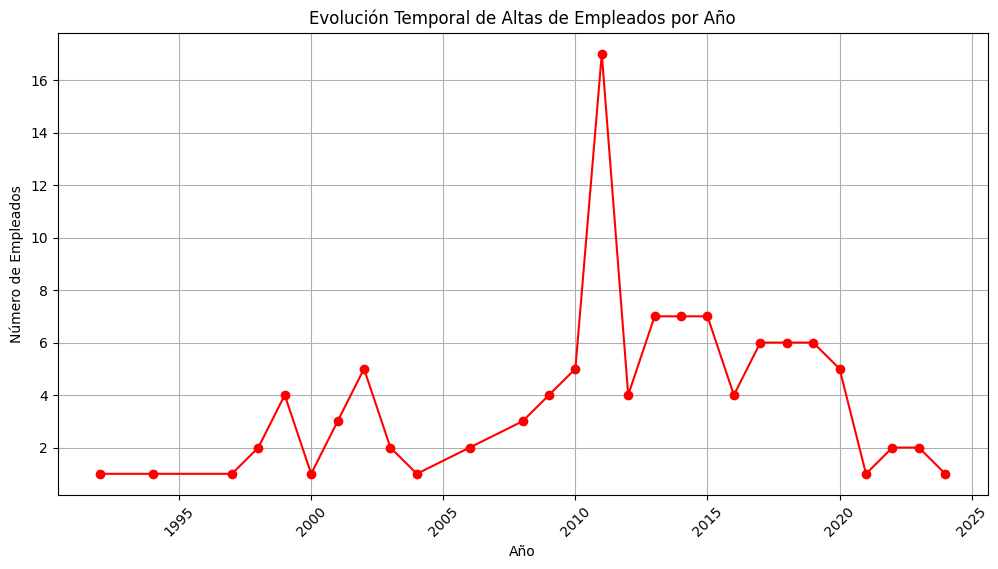

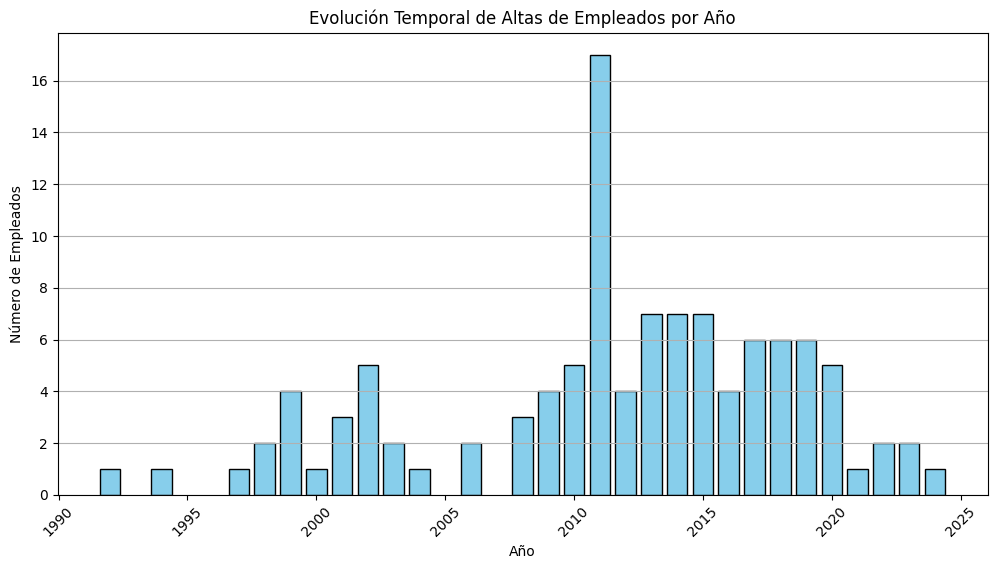

In [ ]:
altas_anhos = empleado_df['F_ALTA'].dt.year.value_counts().sort_index().reset_index()

altas_anhos.columns = ['Año', 'Altas']

print(altas_anhos)

# Crear la gráfica de líneas para la evolución temporal de altas
plt.figure(figsize=(12, 6))
plt.plot(altas_anhos['Año'], altas_anhos['Altas'], marker='o', linestyle='-', color='red')
plt.xlabel('Año')
plt.ylabel('Número de Empleados')
plt.title('Evolución Temporal de Altas de Empleados por Año')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Crear la gráfica de barras para la evolución temporal de altas
plt.figure(figsize=(12, 6))
plt.bar(altas_anhos['Año'], altas_anhos['Altas'], color='skyblue', edgecolor='black')
plt.xlabel('Año')
plt.ylabel('Número de Empleados')
plt.title('Evolución Temporal de Altas de Empleados por Año')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

**Evolución temporal de bajas por años (se puede combinar con la anterior si se desea)**

In [ ]:
# Obtener la evolución temporal de bajas por años
bajas_anhos = empleado_df['F_BAJA'].dt.year.value_counts().sort_index().reset_index()
bajas_anhos.columns = ['Año', 'Bajas']

print(bajas_anhos)

     Año  Bajas
0   2008      1
1   2011      2
2   2012      4
3   2013      2
4   2014      1
5   2015      1
6   2016      3
7   2017      4
8   2018      4
9   2019      3
10  2020      5
11  2021      4
12  2022      5
13  2023      3
14  2024     68


     Año  Altas  Bajas
0   1992      1      0
1   1994      1      0
2   1997      1      0
3   1998      2      0
4   1999      4      0
5   2000      1      0
6   2001      3      0
7   2002      5      0
8   2003      2      0
9   2004      1      0
10  2006      2      0
11  2008      3      1
12  2009      4      0
13  2010      5      0
14  2011     17      2
15  2012      4      4
16  2013      7      2
17  2014      7      1
18  2015      7      1
19  2016      4      3
20  2017      6      4
21  2018      6      4
22  2019      6      3
23  2020      5      5
24  2021      1      4
25  2022      2      5
26  2023      2      3
27  2024      1     68


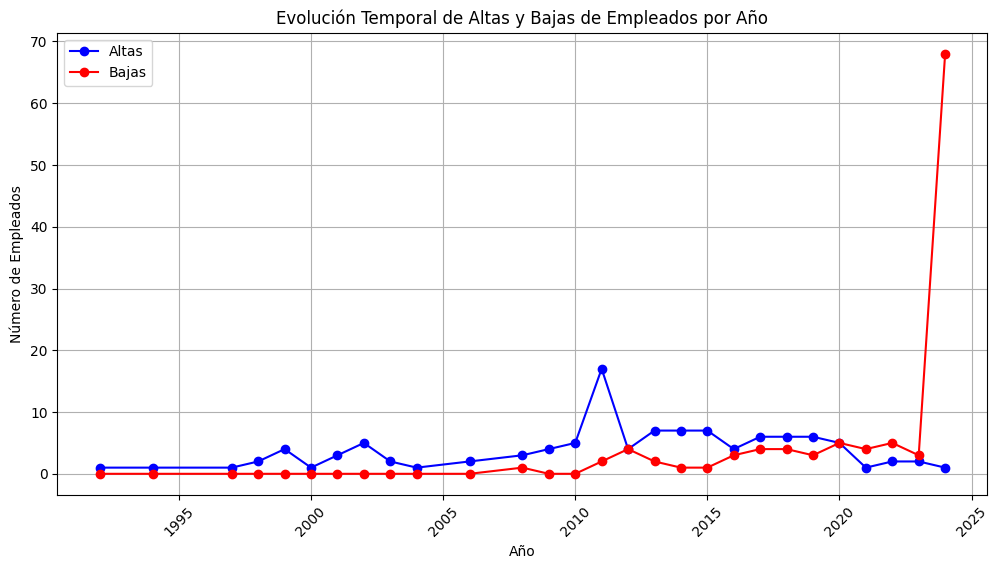

In [ ]:
# Combinar altas y bajas
evolucion_temporal = altas_anhos.merge(bajas_anhos, on='Año', how='outer').fillna(0)
evolucion_temporal['Altas'] = evolucion_temporal['Altas'].astype(int)
evolucion_temporal['Bajas'] = evolucion_temporal['Bajas'].astype(int)

print(evolucion_temporal)

# Crear la gráfica de líneas para la evolución temporal de altas y bajas
plt.figure(figsize=(12, 6))
plt.plot(evolucion_temporal['Año'], evolucion_temporal['Altas'], marker='o', linestyle='-', color='blue', label='Altas')
plt.plot(evolucion_temporal['Año'], evolucion_temporal['Bajas'], marker='o', linestyle='-', color='red', label='Bajas')
plt.xlabel('Año')
plt.ylabel('Número de Empleados')
plt.title('Evolución Temporal de Altas y Bajas de Empleados por Año')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**¿Cuáles han sido los dos años de mayor crecimiento/decrecimiento de empleados?**



*    Calcular la diferencia entre bajas y altas de empleados

In [ ]:
# Calcular el diferencia entre bajas y altas de empleados por año
evolucion_temporal['Diferencia_Alta_Bajas'] = evolucion_temporal['Altas'] - evolucion_temporal['Bajas']

# Mostrar el DataFrame con la diferencia de empleados
print(evolucion_temporal)

     Año  Altas  Bajas  Diferencia_Alta_Bajas
0   1992      1      0                      1
1   1994      1      0                      1
2   1997      1      0                      1
3   1998      2      0                      2
4   1999      4      0                      4
5   2000      1      0                      1
6   2001      3      0                      3
7   2002      5      0                      5
8   2003      2      0                      2
9   2004      1      0                      1
10  2006      2      0                      2
11  2008      3      1                      2
12  2009      4      0                      4
13  2010      5      0                      5
14  2011     17      2                     15
15  2012      4      4                      0
16  2013      7      2                      5
17  2014      7      1                      6
18  2015      7      1                      6
19  2016      4      3                      1
20  2017      6      4            



*   Identificar los Años de Mayor Crecimiento y Decrecimiento



Años de mayor crecimiento:
     Año  Altas  Bajas  Diferencia_Alta_Bajas
14  2011     17      2                     15
18  2015      7      1                      6

Años de mayor decrecimiento:
     Año  Altas  Bajas  Diferencia_Alta_Bajas
25  2022      2      5                     -3
27  2024      1     68                    -67


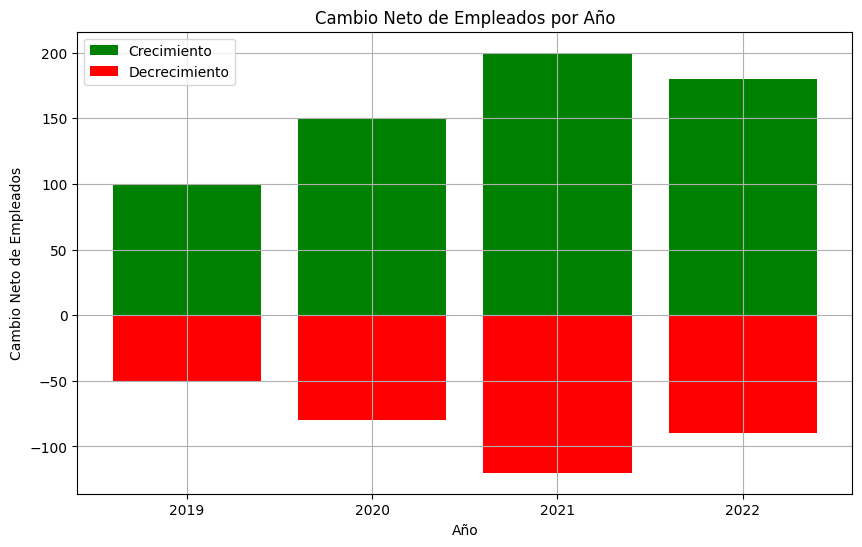

In [ ]:
# Ordenar los datos por el cambio neto de empleados
evolucion_temporal_ordenado = evolucion_temporal.sort_values(by='Diferencia_Alta_Bajas', ascending=False)

# Obtener los dos años de mayor crecimiento
mayor_crecimiento = evolucion_temporal_ordenado.head(2)

# Obtener los dos años de mayor decrecimiento
mayor_decrecimiento = evolucion_temporal_ordenado.tail(2)

print("Años de mayor crecimiento:")
print(mayor_crecimiento)

print("\nAños de mayor decrecimiento:")
print(mayor_decrecimiento)

# GRÁFICO:
# Datos de ejemplo para los años de mayor crecimiento y decrecimiento
años = [2019, 2020, 2021, 2022]
crecimiento = [100, 150, 200, 180]  # Cambio neto positivo
decrecimiento = [-50, -80, -120, -90]  # Cambio neto negativo

# Crear la gráfica de barras apiladas
plt.figure(figsize=(10, 6))

# Barra para el crecimiento
plt.bar(años, crecimiento, color='green', label='Crecimiento')

# Barra para el decrecimiento
plt.bar(años, decrecimiento, color='red', label='Decrecimiento')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cambio Neto de Empleados')
plt.title('Cambio Neto de Empleados por Año')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.xticks(años)  # Mostrar todos los años en el eje x
plt.show()

**Distribución de empleados solteros vs casados**

  Estado Civil  Número de Empleados
0            C                   59
1            S                   51


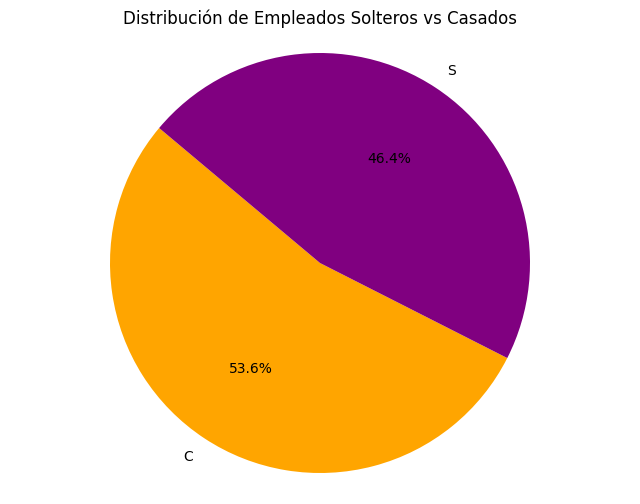

In [ ]:
# Calcular la distribución de empleados solteros vs casados
estado_civil = empleado_df['CX_EDOCIVIL'].value_counts().reset_index()
estado_civil.columns = ['Estado Civil', 'Número de Empleados']

print(estado_civil)

# Crear la gráfica de pastel para la distribución de empleados solteros vs casados
plt.figure(figsize=(8, 6))
plt.pie(estado_civil['Número de Empleados'], labels=estado_civil['Estado Civil'], autopct='%1.1f%%', colors=['orange', 'purple'], startangle=140)
plt.title('Distribución de Empleados Solteros vs Casados')
plt.axis('equal')  # Asegura que el gráfico de pastel sea circular
plt.show()

**Distribución de la edad de los empleados**

    Edad  Empleados
0     24          4
1     25          4
2     26          1
3     27          2
4     28          3
5     29          1
6     30          3
7     31          1
8     32          2
9     33          4
10    34          6
11    35          3
12    36          2
13    37          4
14    38          2
15    39          3
16    40          6
17    41          5
18    42          7
19    43          5
20    44          5
21    45          3
22    46          3
23    47          4
24    48          2
25    49          5
26    50          1
27    51          3
28    52         11
29    53          2
30    54          1
31    55          2


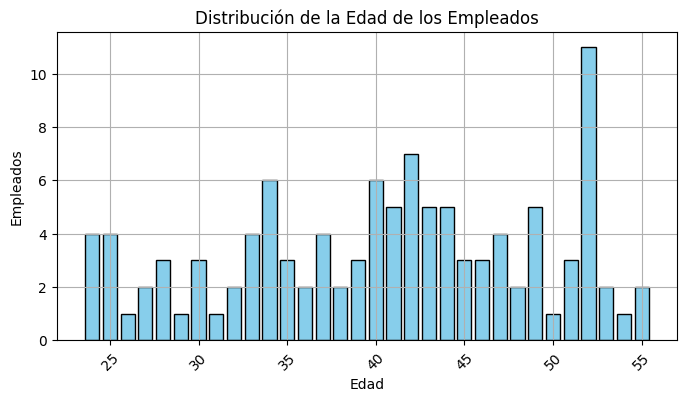

In [ ]:
empleado_df['F_NACIMIENTO'] = pd.to_datetime(empleado_df['F_NACIMIENTO'])

# Calcular la edad de los empleados por su fecha de nacimiento
empleado_df['Edad'] = (pd.to_datetime('today').year - empleado_df['F_NACIMIENTO'].dt.year) - ((pd.to_datetime('today').month < empleado_df['F_NACIMIENTO'].dt.month) | ((pd.to_datetime('today').month == empleado_df['F_NACIMIENTO'].dt.month) & (pd.to_datetime('today').day < empleado_df['F_NACIMIENTO'].dt.day)))

# Calcular el número de años de los empleados
edad_distribucion = empleado_df['Edad'].value_counts().sort_index().reset_index()
edad_distribucion.columns = ['Edad', 'Empleados']

print(edad_distribucion)

# Crear la gráfica de barras para la distribución de la edad
plt.figure(figsize=(8, 4))
plt.bar(edad_distribucion['Edad'], edad_distribucion['Empleados'], color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Empleados')
plt.title('Distribución de la Edad de los Empleados')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Edad media y desviación típica de los empleados**

*   Calcular la edad media: mean()
*   Calcular desviación típica: std()



In [ ]:
# Calcular la edad media y la desviación estándar de los empleados
edad_media = empleado_df['Edad'].mean()
desviacion_tipica = empleado_df['Edad'].std()

print("Edad media de los empleados:", edad_media.round(2))
print("Desviación típica de la edad de los empleados:", desviacion_tipica.round(2))



Edad media de los empleados: 40.45
Desviación típica de la edad de los empleados: 8.66


# **PROYECTOS**

**Número de proyectos activos, finalizados y total**

Número de Proyectos Activos: 6
Número de Proyectos Finalizados: 32
Número Total de Proyectos: 38


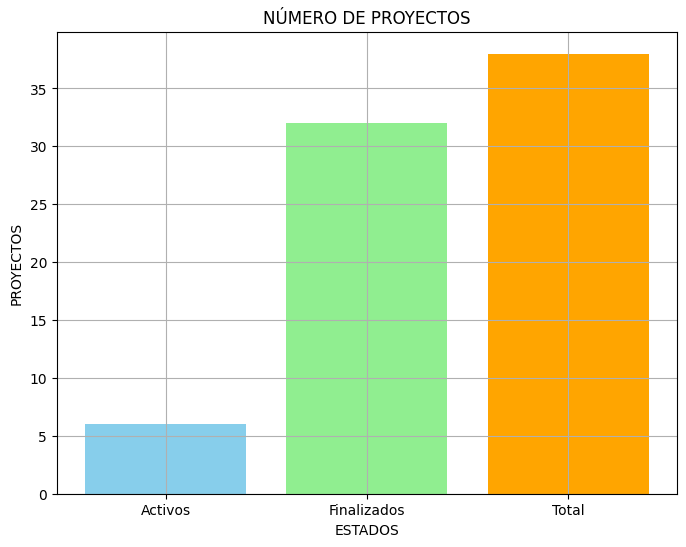

In [ ]:
# Calcular el número de proyectos activos y finalizados
proyectos_activos = proyecto_df[proyecto_df['F_FIN'].isnull()].shape[0]
proyectos_finalizados = proyecto_df[proyecto_df['F_FIN'].notnull()].shape[0]

# Calcular el número total de proyectos
proyectos_total = proyecto_df.shape[0]

# Crear un DataFrame para representar estos datos
data = {'Estado': ['Activos', 'Finalizados', 'Total'],
        'PROYECTOS': [proyectos_activos, proyectos_finalizados, proyectos_total]}
proyectos_df = pd.DataFrame(data)

# Imprimir por pantalla el número de proyectos activos, finalizados y total
print("Número de Proyectos Activos:", proyectos_activos)
print("Número de Proyectos Finalizados:", proyectos_finalizados)
print("Número Total de Proyectos:", proyectos_total)

# Visualizar los datos utilizando un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(proyectos_df['Estado'], proyectos_df['PROYECTOS'], color=['skyblue', 'lightgreen', 'orange'])
plt.xlabel('ESTADOS')
plt.ylabel('PROYECTOS')
plt.title('NÚMERO DE PROYECTOS')
plt.grid(True)
plt.show()

**Distribución de la duración de los proyectos (histograma)**

primero necesitamos calcular la duración de cada proyecto. Podemos hacerlo restando la fecha de inicio (F_INICIO) de la fecha de finalización (F_FIN) para los proyectos finalizados. Para los proyectos activos, podemos calcular la duración hasta la fecha actual.

Proyecto: proyecto Mafre, Duración: 619 días
Proyecto: proyecto Seur, Duración: 253 días
Proyecto: proyecto ayuntamiento Alcobendas, Duración: 618 días
Proyecto: proyecto ayuntamiento San Sebastian de los Reyes, Duración: 619 días
Proyecto: proyecto ayuntamiento Alcorcon, Duración: 253 días
Proyecto: proyecto ayuntamiento Moratalaz, Duración: 314 días
Proyecto: proyecto Caser, Duración: 1044 días
Proyecto: proyecto Caser 2, Duración: 314 días
Proyecto: proyecto Caser 3, Duración: 528 días
Proyecto: proyecto Linea directa, Duración: 528 días
Proyecto: proyecto farolillos, Duración: 893 días
Proyecto: proyecto LaCaixa, Duración: 61 días
Proyecto: proyecto BBVA, Duración: 30 días
Proyecto: proyecto Santander, Duración: 396 días
Proyecto: proyecto Santander, Duración: 256 días
Proyecto: proyecto Sabadell, Duración: 194 días
Proyecto: proyecto Unicaja, Duración: 194 días
Proyecto: proyecto Ancianos, Duración: 120 días
Proyecto: proyecto Ancianos 2 , Duración: 60 días
Proyecto: proyecto Terc

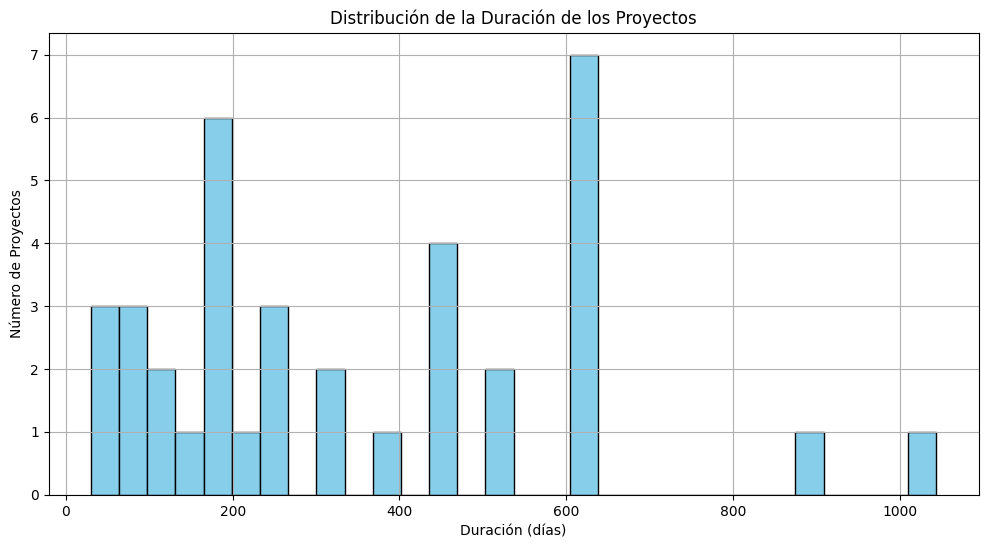

In [ ]:

# Calcular la duración de los proyectos finalizados
proyecto_df['DURACION'] = pd.to_datetime(proyecto_df['F_FIN']) - pd.to_datetime(proyecto_df['F_INICIO'])

# Calcular la duración de los proyectos activos (hasta la fecha actual)
fecha_actual = pd.to_datetime('today')
proyecto_df.loc[proyecto_df['F_FIN'].isnull(), 'DURACION'] = fecha_actual - pd.to_datetime(proyecto_df['F_INICIO'])

# Convertir la duración a días
proyecto_df['DURACION'] = proyecto_df['DURACION'].dt.days

# Filtrar los proyectos con duración negativa (posibles errores en los datos)
proyecto_df = proyecto_df[proyecto_df['DURACION'] >= 0]

# Imprimir nombres de proyectos y su duración
for nombre, duracion in zip(proyecto_df['TX_DESCRIPCIÓN'], proyecto_df['DURACION']):
    print(f"Proyecto: {nombre}, Duración: {duracion} días")

# Crear el histograma para la distribución de la duración de los proyectos
plt.figure(figsize=(12, 6))
plt.hist(proyecto_df['DURACION'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Duración (días)')
plt.ylabel('Número de Proyectos')
plt.title('Distribución de la Duración de los Proyectos')
plt.grid(True)
plt.show()




**Distribución de proyectos por lugar**

Distribución de Proyectos por Lugar:
TX_LUGAR
Madrid                         22
Cuenca                          5
Alcobendas                      3
Moratalaz                       3
 San Sebastian de los Reyes     1
Alcorcon                        1
Barcelona                       1
Albolote                        1
Name: count, dtype: int64


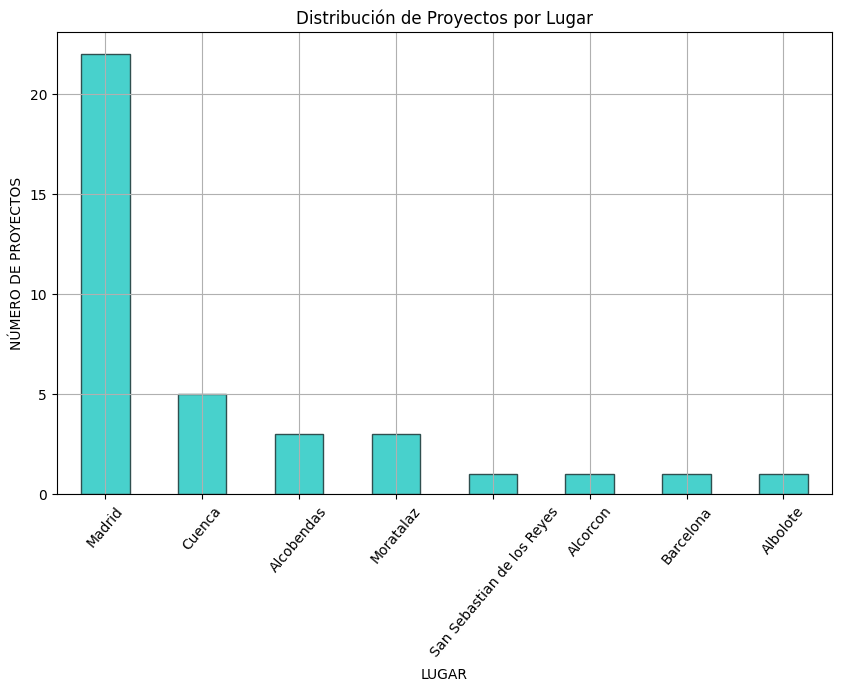

In [ ]:
# Contar el número de proyectos por lugar
proyectos_lugar = proyecto_df['TX_LUGAR'].value_counts()

# Imprimir por pantalla la distribución de proyectos por lugar
print("Distribución de Proyectos por Lugar:")
print(proyectos_lugar)

# Crear el gráfico de barras para la distribución de proyectos por lugar
plt.figure(figsize=(10, 6))
proyectos_lugar.plot(kind='bar', color='mediumturquoise', edgecolor='darkslategrey')
plt.xlabel('LUGAR')
plt.ylabel('NÚMERO DE PROYECTOS')
plt.title('Distribución de Proyectos por Lugar')
plt.grid(True)
plt.xticks(rotation=50)
plt.show()

# **Proyectos y Empleados**

**Distribución del número de proyectos a los que están asignados los empleados en activo**

Personas asignadas a 1 proyecto(s): 36
Personas asignadas a 2 proyecto(s): 13
Personas asignadas a 3 proyecto(s): 4
Personas asignadas a 4 proyecto(s): 1
Personas asignadas a 5 proyecto(s): 3


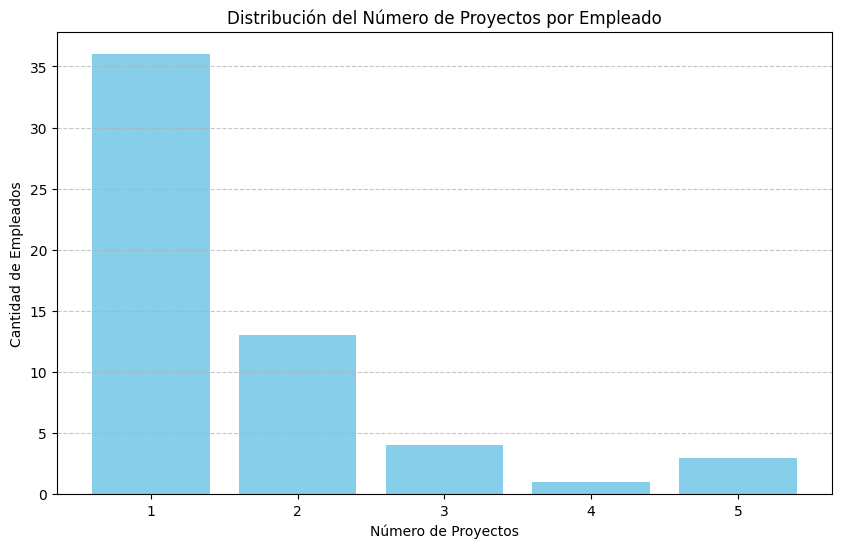

In [ ]:
# Filtrar empleados activos
empleados_activos = empleado_df[empleado_df['F_BAJA'] > fecha_actual]

# Contar el número de proyectos por empleado
proyectos_por_empleado = empl_proy_df.groupby('ID_EMPLEADO').size()

# Contar cuántos empleados están asignados a cada cantidad de proyectos
distribucion_proyectos = proyectos_por_empleado.value_counts().sort_index()

# Paso 4: Imprimir los resultados
for proyectos, cantidad_empleados in distribucion_proyectos.items():
    print(f"Personas asignadas a {proyectos} proyecto(s): {cantidad_empleados}")

# Graficar la distribución del número de proyectos por empleado
plt.figure(figsize=(10, 6))
plt.bar(distribucion_proyectos.index, distribucion_proyectos.values, color='skyblue')
plt.xlabel('Número de Proyectos')
plt.ylabel('Cantidad de Empleados')
plt.title('Distribución del Número de Proyectos por Empleado')
plt.xticks(range(1, max(distribucion_proyectos.index) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Top 5 proyectos con más personas asignadas**

Proyecto 1: 10 personas asignadas
Proyecto 3: 10 personas asignadas
Proyecto 2: 9 personas asignadas
Proyecto 5: 8 personas asignadas
Proyecto 13: 6 personas asignadas


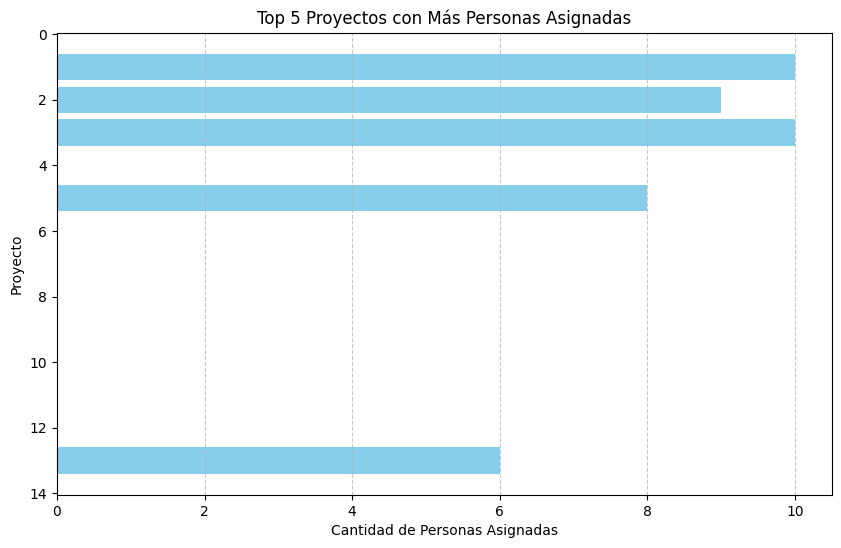

In [ ]:
# Contar cuántas personas están asignadas a cada proyecto
personas_por_proyecto = empl_proy_df.groupby('ID_PROYECTO').size()

# Ordenar los proyectos por la cantidad de personas asignadas de manera descendente
top_proyectos = personas_por_proyecto.nlargest(5)

# Imprimir los resultados en el formato deseado
for proyecto, personas_asignadas in top_proyectos.items():
    print(f"Proyecto {proyecto}: {personas_asignadas} personas asignadas")

# Graficar los top 5 proyectos con más personas asignadas
plt.figure(figsize=(10, 6))
plt.barh(top_proyectos.index, top_proyectos.values, color='skyblue')
plt.xlabel('Cantidad de Personas Asignadas')
plt.ylabel('Proyecto')
plt.title('Top 5 Proyectos con Más Personas Asignadas')
plt.gca().invert_yaxis()  # Invertir el eje y para que el proyecto con más personas esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Lista de proyectos sin personas asignadas (detección de anomalía)  

In [ ]:
# Crear una lista de todos los proyectos
todos_proyectos = proyecto_df['ID_PROYECTO'].unique()

# Obtener una lista de proyectos a los que están asignadas personas
proyectos_con_asignaciones = empl_proy_df['ID_PROYECTO'].unique()

# Identificar los proyectos que no están en la lista de proyectos asignados
proyectos_sin_asignaciones = [proyecto for proyecto in todos_proyectos if proyecto not in proyectos_con_asignaciones]

# Imprimir los proyectos sin personas asignadas
if proyectos_sin_asignaciones:
    print("Proyectos sin personas asignadas:")
    for proyecto in proyectos_sin_asignaciones:
        print(proyecto)
else:
    print("Todos los proyectos tienen personas asignadas.")

Proyectos sin personas asignadas:
7
15
22
26
27
28
29
30
31
34
35
38


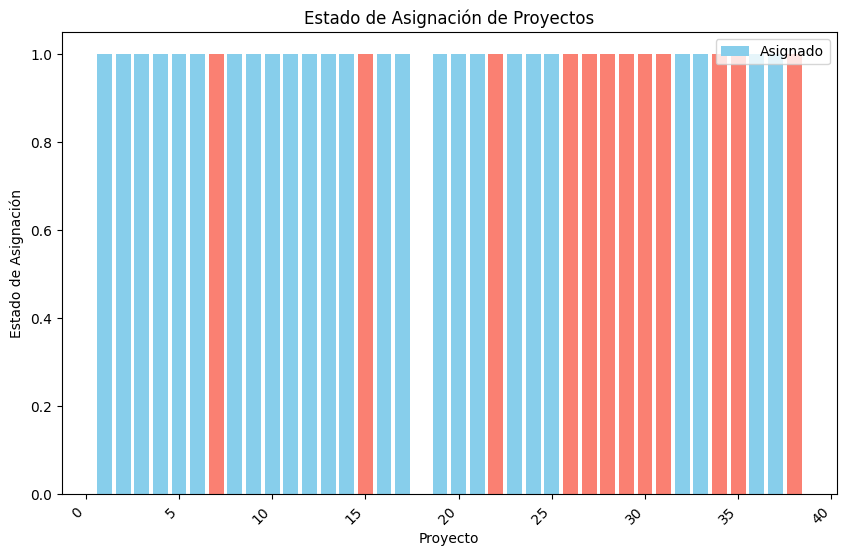

In [ ]:
import numpy as np

# Crear una serie con el estado de asignación para cada proyecto
estado_asignacion = ['Asignado' if proyecto in proyectos_con_asignaciones else 'Sin asignar' for proyecto in todos_los_proyectos]

# Crear una matriz de colores basada en el estado de asignación
colores = np.where(np.array(estado_asignacion) == 'Asignado', 'skyblue', 'salmon')

# Graficar los proyectos y su estado de asignación
plt.figure(figsize=(10, 6))
plt.bar(todos_proyectos, np.ones(len(todos_proyectos)), color=colores)
plt.xlabel('Proyecto')
plt.ylabel('Estado de Asignación')
plt.title('Estado de Asignación de Proyectos')
plt.xticks(rotation=45, ha='right')
plt.legend(['Asignado', 'Sin asignar'], loc='upper right')
plt.show()